### Imports

In [13]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter


### Dataset Path

In [14]:
RAW_TRAIN_DIR = "../data/raw/train"
RAW_VAL_DIR = "../data/raw/val"
PROCESSED_DIR = "../data/processed"

IMG_SIZE = (224, 224)


### Count Images Per class

In [15]:
def count_images(directory):
    counts = {}
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            counts[cls] = len(os.listdir(cls_path))
    return counts

train_counts = count_images(RAW_TRAIN_DIR)
val_counts = count_images(RAW_VAL_DIR)

train_counts, val_counts


({'burger': 50,
  'cake': 50,
  'french_fries': 50,
  'ice_cream': 50,
  'paneer': 33,
  'pasta': 50,
  'pizza': 50,
  'salad': 50,
  'sandwich': 50},
 {'burger': 20,
  'cake': 20,
  'french_fries': 20,
  'ice_cream': 20,
  'paneer': 20,
  'pasta': 20,
  'pizza': 20,
  'salad': 20,
  'sandwich': 20})

### Visualize Class Distribution

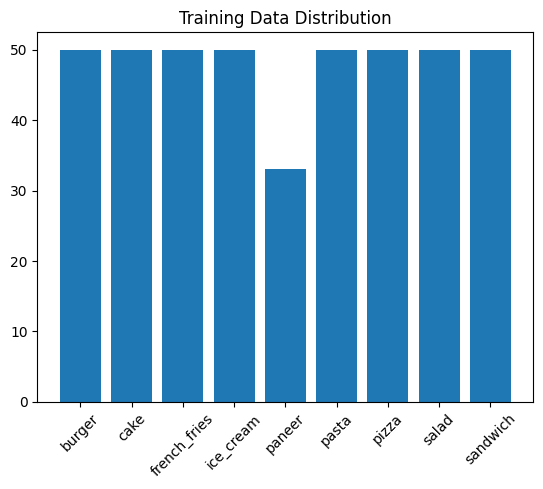

In [16]:
plt.bar(train_counts.keys(), train_counts.values())
plt.xticks(rotation=45)
plt.title("Training Data Distribution")
plt.show()


### Visualize Sample Images

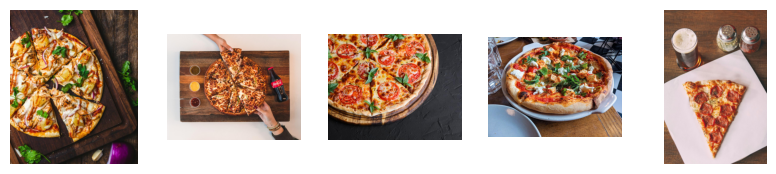

In [17]:
import random

def show_samples(directory, cls):
    cls_path = os.path.join(directory, cls)
    images = random.sample(os.listdir(cls_path), 5)

    plt.figure(figsize=(10,2))
    for i, img in enumerate(images):
        img_path = os.path.join(cls_path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(1,5,i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

show_samples(RAW_TRAIN_DIR, "pizza")


### Resize & Save Processed Images

In [18]:
def process_and_save(src_dir, dst_dir):
    for cls in os.listdir(src_dir):
        src_cls_path = os.path.join(src_dir, cls)
        dst_cls_path = os.path.join(dst_dir, cls)

        os.makedirs(dst_cls_path, exist_ok=True)

        for img_name in os.listdir(src_cls_path):
            img_path = os.path.join(src_cls_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.resize(img, IMG_SIZE)
            cv2.imwrite(os.path.join(dst_cls_path, img_name), img)

process_and_save(RAW_TRAIN_DIR, "../data/processed/train")
process_and_save(RAW_VAL_DIR, "../data/processed/val")

# Verify Processed Data
count_images("../data/processed/train")

{'burger': 50,
 'cake': 50,
 'french_fries': 50,
 'ice_cream': 50,
 'paneer': 33,
 'pasta': 50,
 'pizza': 50,
 'salad': 50,
 'sandwich': 50}

##